In [5]:
from google.colab import files
uploaded = files.upload()

Saving customer_segmentation_data.csv to customer_segmentation_data.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
data = pd.read_csv('customer_segmentation_data.csv')

In [7]:
data.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [8]:
data['gender'].value_counts()

,count
gender,
Male,357
Other,327
Female,316


In [9]:
data['preferred_category'].value_counts()

,count
preferred_category,
Electronics,215
Sports,210
Home & Garden,206
Groceries,199
Clothing,170


In [10]:
data.shape

(1000, 9)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [12]:
data.dtypes

,0
id,int64
age,int64
gender,object
income,int64
spending_score,int64
membership_years,int64
purchase_frequency,int64
preferred_category,object
last_purchase_amount,float64


In [13]:
data.isnull().sum()

,0
id,0
age,0
gender,0
income,0
spending_score,0
membership_years,0
purchase_frequency,0
preferred_category,0
last_purchase_amount,0


In [14]:
data.isnull().sum().sum()

0

In [15]:
data.duplicated().sum()

0

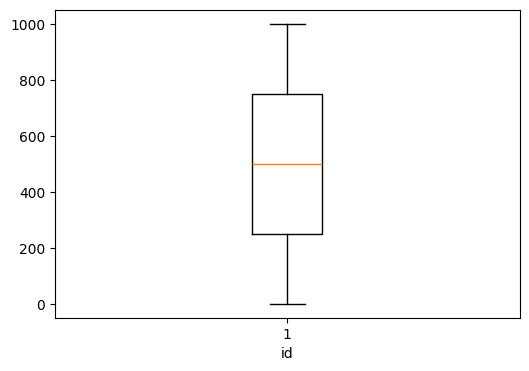

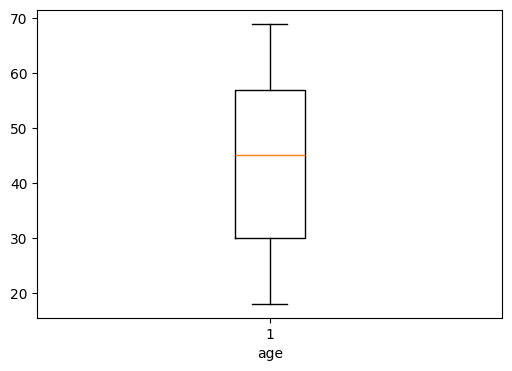

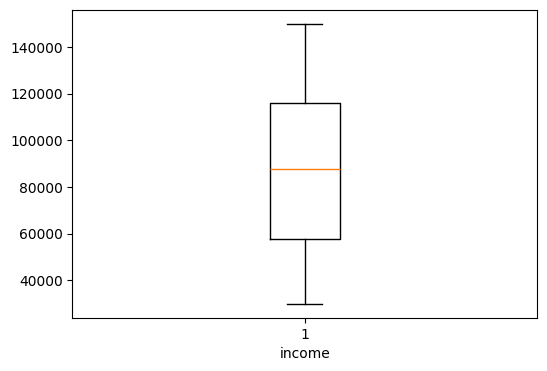

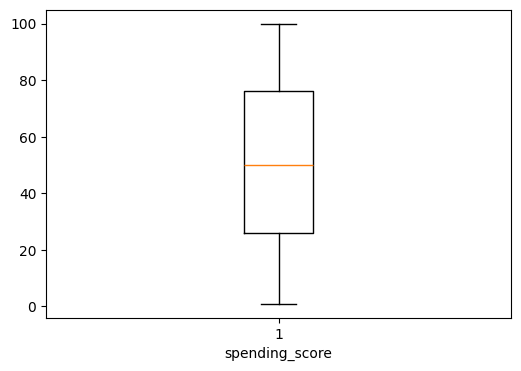

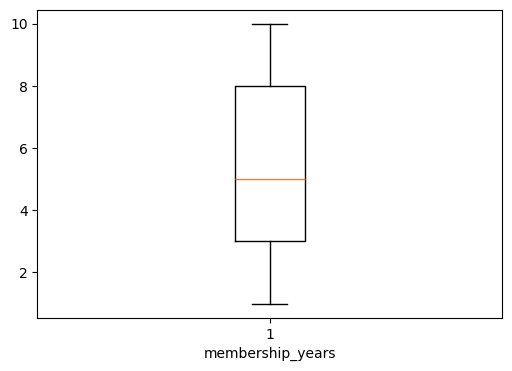

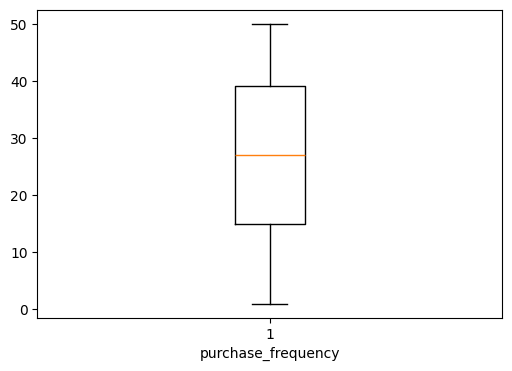

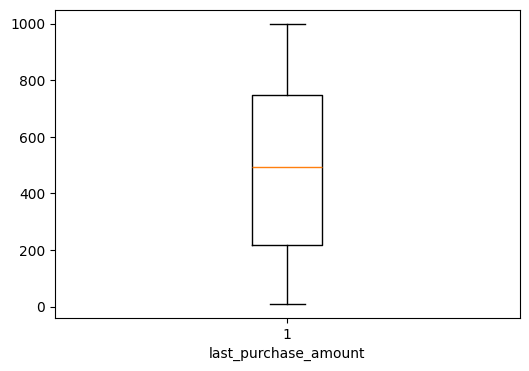

In [16]:
for col in data.columns:
  if (data[col].dtypes!='object'):
    plt.figure(figsize=(6,4))
    plt.boxplot(data[col],data=data)
    plt.xlabel(col)
    plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['preferred_category'] = le.fit_transform(data['preferred_category'])

In [18]:
data.drop(columns =['id','age'], inplace = True)

In [19]:
X=data.drop(columns = 'last_purchase_amount')
y=data['last_purchase_amount']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(data)
data_scaled =pd.DataFrame(scaled,columns=data.columns)
data_scaled

,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,-1.260917,0.316868,1.358468,-0.865010,-0.182348,-0.051028,-1.281540
1,-1.260917,-0.282016,0.321865,-1.215358,1.082005,1.386386,-1.523763
2,-1.260917,1.112778,-0.714738,-1.215358,0.098620,-1.488442,-0.230005
3,1.233479,-1.210096,0.805613,1.237080,-1.516943,0.667679,1.690080
4,-1.260917,1.523374,-1.025718,-0.865010,-0.112106,-0.769735,-0.491443
...,...,...,...,...,...,...,...
995,-0.013719,0.691806,0.218205,0.186035,-1.797910,-1.488442,-0.604570
996,1.233479,-0.677034,0.874720,1.587428,-0.252590,-0.051028,0.475247
997,-0.013719,0.718900,-0.369203,-0.164313,1.082005,1.386386,-1.411583
998,-1.260917,0.736379,0.425525,0.536383,1.222489,-0.769735,0.043341


In [22]:
from sklearn.cluster import KMeans
k_value = list(range(1,11))
k_value

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [23]:
ssd =[]
for k in k_value:
  kmeans = KMeans(n_clusters=k,max_iter=150,random_state=42)
  kmeans.fit(data_scaled)
  ssd.append(kmeans.inertia_)

In [24]:
ssd

[7000.000000000006,
 6247.17374170731,
 5693.638870495907,
 5339.990333372776,
 5029.072123480973,
 4783.383958430832,
 4560.470942686433,
 4366.460815061681,
 4205.229246732998,
 4080.9908144584238]

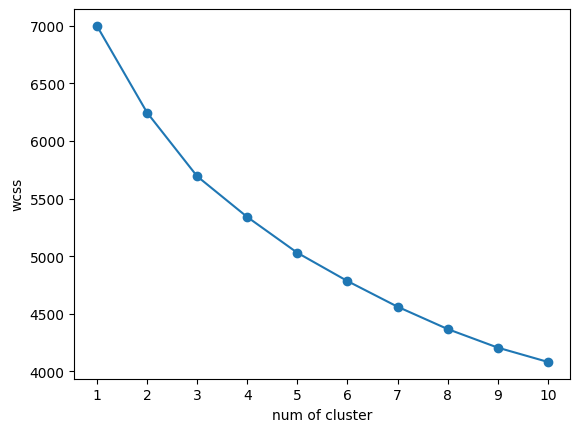

In [25]:
plt.plot(k_value,ssd,marker='o')
plt.xticks(range(1,11))
plt.xlabel("num of cluster")
plt.ylabel("wcss")
plt.show()

In [26]:
k_model = KMeans(n_clusters=5,max_iter=150,random_state=42,init="k-means++")
k_model.fit(data_scaled)

KMeans(max_iter=150, n_clusters=5, random_state=42)

In [27]:
arr=k_model.labels_
arr

array([4, 2, 0, 3, 0, 1, 3, 4, 3, 2, 1, 3, 2, 1, 0, 1, 0, 0, 4, 4, 0, 3,
       3, 3, 2, 1, 1, 2, 2, 0, 3, 2, 1, 4, 3, 0, 4, 3, 2, 1, 0, 4, 1, 3,
       3, 1, 4, 2, 1, 4, 2, 2, 3, 2, 0, 3, 1, 0, 0, 0, 1, 4, 2, 0, 1, 4,
       4, 2, 4, 3, 2, 3, 0, 2, 1, 4, 0, 1, 1, 3, 3, 4, 2, 2, 4, 1, 0, 1,
       0, 3, 1, 3, 2, 1, 3, 4, 1, 3, 3, 2, 0, 2, 2, 1, 3, 0, 3, 3, 2, 2,
       0, 3, 1, 1, 1, 4, 0, 3, 3, 0, 0, 2, 1, 2, 3, 2, 2, 3, 3, 0, 3, 2,
       3, 2, 2, 1, 1, 0, 2, 2, 3, 1, 3, 2, 3, 3, 1, 0, 4, 1, 4, 0, 3, 3,
       4, 4, 0, 3, 3, 1, 0, 3, 2, 1, 1, 2, 2, 4, 2, 3, 1, 0, 4, 3, 2, 3,
       1, 4, 2, 0, 4, 0, 2, 1, 2, 4, 1, 1, 0, 3, 4, 1, 2, 3, 3, 1, 2, 4,
       2, 2, 0, 3, 1, 1, 4, 0, 2, 2, 0, 1, 2, 1, 0, 0, 4, 0, 0, 1, 2, 4,
       2, 0, 0, 2, 2, 2, 3, 1, 3, 2, 4, 1, 2, 2, 2, 3, 3, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 1, 1, 4, 1, 1, 4, 1, 3, 4, 3, 0, 3, 2, 2, 4, 3, 3, 2,
       4, 3, 0, 1, 2, 2, 0, 0, 3, 3, 4, 2, 3, 0, 3, 2, 3, 0, 0, 1, 1, 4,
       4, 4, 3, 3, 0, 3, 3, 3, 4, 1, 1, 1, 1, 4, 0,

In [28]:
data['clusterID'] = arr

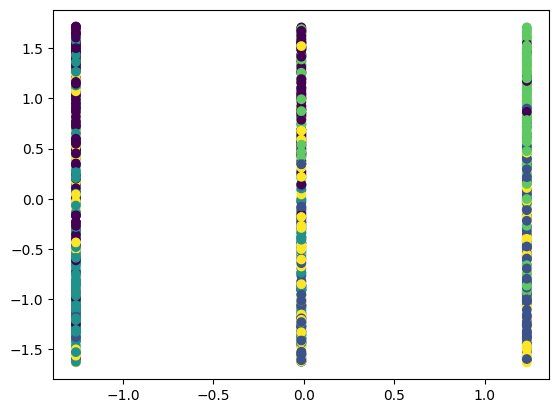

In [30]:
plt.scatter(scaled[:,0],scaled[:,-1],c=arr)
plt.show()

In [37]:
!pip install kneed

In [38]:
from kneed import KneeLocator

In [40]:
kl=KneeLocator(range(1,11),ssd,curve='convex',direction='decreasing')
kl.elbow

4

*Hierarichal Clustering Implimentation*

In [46]:
data_scaled.shape

(1000, 7)

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca = PCA(n_components=2)

In [49]:
pca

PCA(n_components=2)

In [50]:
pca_scaled = pca.fit_transform(data_scaled)

In [51]:
pca_scaled.shape

(1000, 2)

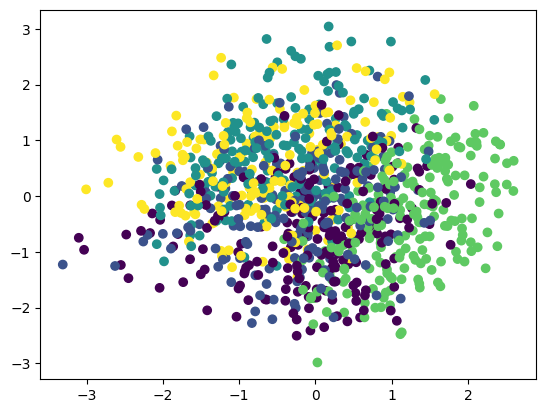

In [57]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,-1],c=arr)

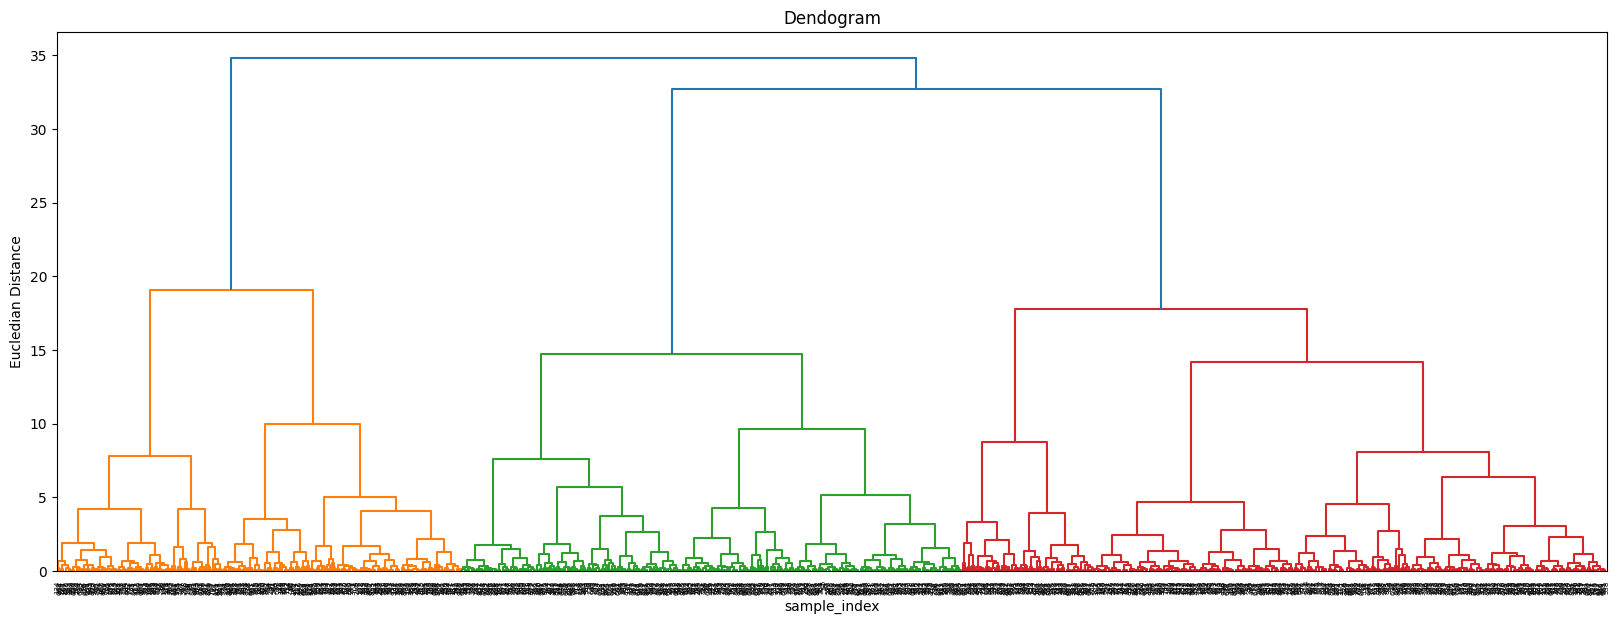

In [56]:
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20,7))
plt.title("Dendodram")

sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('Dendogram')
plt.xlabel('sample_index')
plt.xticks(rotation = 90)
plt.ylabel('Eucledian Distance')
plt.show()